# Import Library

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
path = './precip.mon.ltm.nc'
ncfile=xr.open_dataset(path)
print(ncfile)

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbitin

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [3]:
precip=ncfile.data_vars['precip']
#xarray.data_vars | Dictionary of xarray. DataArray objects corresponding to data variables
#Dictionary니까 변수 이름(여기서는 precip)이 dict.의 key가 되는 거고 
#변수의 data값이 (precip data값) value로써 호출되는 것?

print(precip.shape)

(12, 72, 144)


In [4]:
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(0)

In [5]:
#wusa =  western U.S.A 
#좌표는 https://url.kr/bur7he  그림 참고함.
precip_wusa = precip.sel(lon=240, method = 'nearest')
precip_wusa = precip_wusa.sel(lat=slice(30, 60))
#more info. data 셀렉하고 인덱싱하는 법 | https://url.kr/7paovh

print(precip_wusa.shape) #[time, lat] , longitude는 240으로 고정.
print(precip_wusa)
print(precip_wusa.lat) #latitude array 확인해보기. 
print(precip_wusa.time)

(12, 12)
<xarray.DataArray 'precip' (time: 12, lat: 12)>
array([[0.409733, 2.718339, 2.227801, 1.614767, 1.055498, 1.411854, 1.705631,
        1.829606, 3.361102, 1.408177, 0.92897 , 0.717994],
       [0.545002, 3.328863, 2.414519, 1.644881, 0.951238, 1.207588, 1.351266,
        1.345435, 2.214795, 1.027217, 0.678077, 0.639764],
       [0.410566, 1.964955, 1.88488 , 1.322701, 0.828167, 1.203128, 1.311044,
        1.286391, 2.05407 , 1.100131, 0.71499 , 0.629696],
       [0.214271, 0.94888 , 1.025659, 0.981012, 0.812626, 1.151628, 1.157157,
        1.164122, 1.779981, 1.015735, 0.734604, 0.601915],
       [0.204495, 0.266834, 0.474978, 0.832754, 0.894855, 1.294905, 1.21702 ,
        1.556575, 1.998855, 1.799845, 1.455974, 1.320612],
       [0.195095, 0.062582, 0.1745  , 0.489643, 0.609615, 0.990509, 1.007462,
        1.707451, 2.595683, 2.704232, 2.47808 , 2.282034],
       [0.171842, 0.049805, 0.146656, 0.303371, 0.204947, 0.451712, 0.369335,
        0.961496, 2.27443 , 2.985627, 2.745

In [6]:
#Transpose Y-T axis

precip_wusa=precip_wusa.transpose('lat','time')
#transpose 전 
#Jan [lat1, lat2, lat3, ... lat12]
#Feb [lat1, lat2, lat3, ... lat12]
# ....

#transpose 후
#lat1 [Jan, Feb, ... , Dec]
#lat2 [Jan, Feb, ... , Dec]
#.....

precip_wusa
#transpose된 array 확인하기. 

<xarray.DataArray 'precip' (lat: 12, time: 12)>
array([[0.40973315, 0.5450018 , 0.41056576, 0.21427138, 0.20449512,
        0.19509505, 0.17184207, 0.164425  , 0.27144992, 0.31388777,
        0.28436834, 0.5509604 ],
       [2.7183394 , 3.3288634 , 1.9649551 , 0.9488803 , 0.2668338 ,
        0.06258164, 0.04980461, 0.0641918 , 0.18537064, 0.63320994,
        1.2572774 , 2.0114853 ],
       [2.2278008 , 2.414519  , 1.8848798 , 1.0256593 , 0.47497833,
        0.1745    , 0.14665587, 0.15309271, 0.24777612, 0.61437637,
        1.2816442 , 2.0504024 ],
       [1.6147671 , 1.6448809 , 1.3227011 , 0.98101217, 0.83275425,
        0.48964274, 0.30337146, 0.29503024, 0.34130067, 0.73307896,
        1.1513437 , 1.5247321 ],
       [1.0554975 , 0.951238  , 0.8281671 , 0.8126259 , 0.89485466,
        0.6096152 , 0.20494679, 0.21342298, 0.37584776, 0.6419878 ,
        0.9033769 , 1.0788367 ],
       [1.4118544 , 1.207588  , 1.2031281 , 1.1516279 , 1.294905  ,
        0.9905091 , 0.4517125 , 0.41131458, 0.49478912, 0.8398262 ,
        1.3851577 , 1.623455  ],
       [1.7056311 , 1.351266  , 1.3110445 , 1.1571572 , 1.21702   ,
        1.007462  , 0.36933482, 0.36792386, 0.5488722 , 0.9849683 ,
        1.7698191 , 1.7826893 ],
       [1.8296064 , 1.3454349 , 1.2863909 , 1.1641223 , 1.5565746 ,
        1.7074507 , 0.9614956 , 0.7539913 , 0.9196041 , 1.172123  ,
        1.9147162 , 2.1102152 ],
       [3.3611023 , 2.2147949 , 2.0540705 , 1.7799805 , 1.9988555 ,
        2.5956833 , 2.2744296 , 2.0697    , 2.199993  , 2.8534598 ,
        3.531273  , 3.232071  ],
       [1.4081767 , 1.0272167 , 1.1001313 , 1.0157354 , 1.7998451 ,
        2.7042315 , 2.9856274 , 2.4428074 , 1.8683017 , 1.5077819 ,
        1.5515078 , 1.2998143 ],
       [0.92896974, 0.67807704, 0.7149896 , 0.7346045 , 1.4559735 ,
        2.4780796 , 2.745326  , 1.9043068 , 1.2998052 , 0.9333112 ,
        0.9519984 , 0.7286619 ],
       [0.71799433, 0.63976353, 0.62969595, 0.601915  , 1.3206117 ,
        2.2820342 , 2.84882   , 1.9842404 , 1.4219519 , 0.9361422 ,
        0.85400677, 0.70663625]], dtype=float32)
Coordinates:
  * lat      (lat) float32 31.25 33.75 36.25 38.75 ... 51.25 53.75 56.25 58.75
    lon      float32 241.2
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [5.6044193e-04 3.0161072e+01]

# Visualization

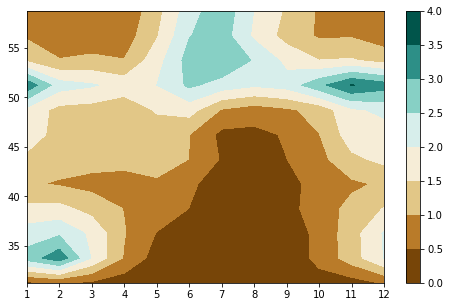

In [8]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize=(8,5) )

month = [ x for x in range(1, 13)]

wusa_contour = ax.contourf(month, precip_wusa.lat, precip_wusa,
           cmap=plt.cm.BrBG )#color map more info. https://url.kr/1waf4d

ax.set_xticks(np.arange(1,len(month)+1, 1))
#x축 간격 1로 설정하기. 
                           
fig.colorbar(wusa_contour)
#colorbar 보여주기 (contour로 표시된 precip의 범위 보기 위해서
#more info. https://url.kr/kex16y 참고. 

plt.show()